****Visualizing Your Data****

🎯 أنواع الرسوم اللي هنتعلمها:

النوع	الاستخدام الرئيسي

Histogram	توزيع variable رقمي (زي الطول – height)

Bar plot	مقارنة بين تصنيفات (زي: الوزن حسب السلالة)

Line plot	تتبّع التغير بمرور الوقت (زي وزن كلب شهريًا)

Scatter plot	علاقة بين متغيرين رقميين (زي الوزن مقابل الطول)

Multiple plots + alpha	مقارنة مجموعات متعددة (زي ذكر/أنثى) بشفافية

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("fuel-econ.csv")
print(df.head())

      id        make           model  year           VClass  \
0  32204      Nissan            GT-R  2013  Subcompact Cars   
1  32205  Volkswagen              CC  2013     Compact Cars   
2  32206  Volkswagen              CC  2013     Compact Cars   
3  32207  Volkswagen      CC 4motion  2013     Compact Cars   
4  32208   Chevrolet  Malibu eAssist  2013     Midsize Cars   

               drive              trans          fuelType  cylinders  displ  \
0    All-Wheel Drive    Automatic (AM6)  Premium Gasoline          6    3.8   
1  Front-Wheel Drive  Automatic (AM-S6)  Premium Gasoline          4    2.0   
2  Front-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
3    All-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
4  Front-Wheel Drive     Automatic (S6)  Regular Gasoline          4    2.4   

   pv2  pv4     city    UCity  highway  UHighway     comb  co2  feScore  \
0   79    0  16.4596  20.2988  22.5568   30.1798  18.7389  471        4

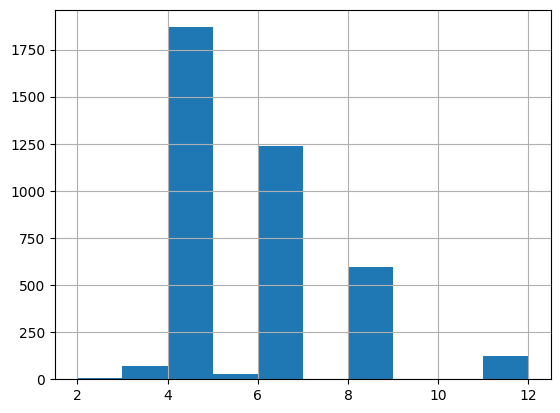

In [3]:
df["cylinders"].hist()   # رسم Histogram
plt.show()               #  X-axis: الطول (cylinders)
                         #  Y-axis: عدد cylinders في كل مدى

<Axes: >

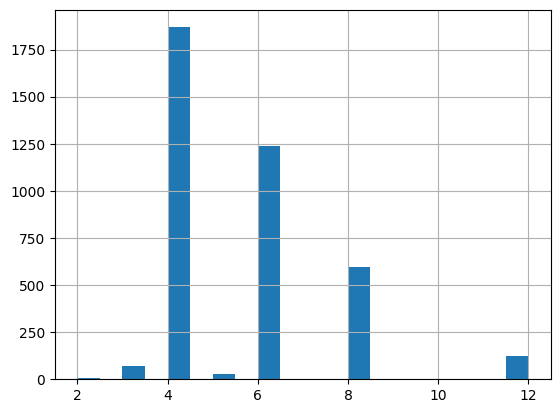

In [4]:
df["cylinders"].hist(bins=20)

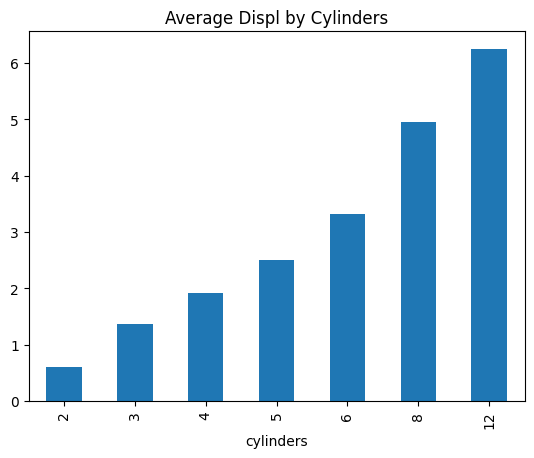

In [5]:
avg_displ = df.groupby("cylinders")["displ"].mean()
avg_displ.plot(kind="bar", title="Average Displ by Cylinders")
plt.show()

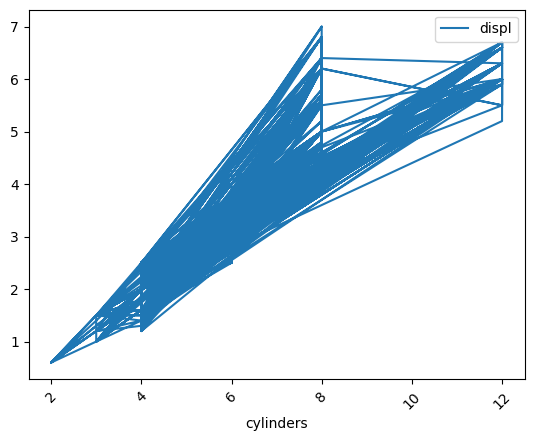

In [10]:
df.plot(x="cylinders",y="displ", kind="line", rot=45)
plt.show()
# rot=45 معناها لف النصوص 45 درجة عشان تكون مقروءة

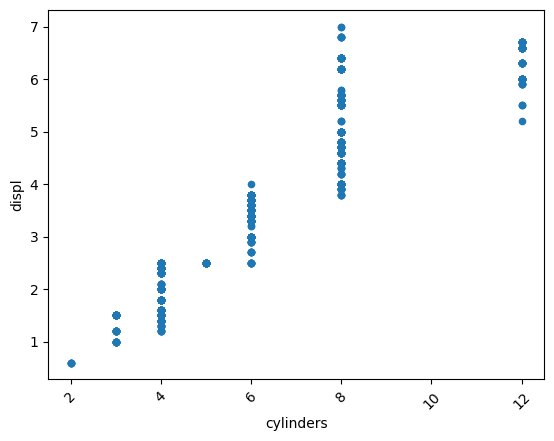

In [11]:
df.plot(x="cylinders",y="displ", kind="scatter", rot=45)
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../Other/heart.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


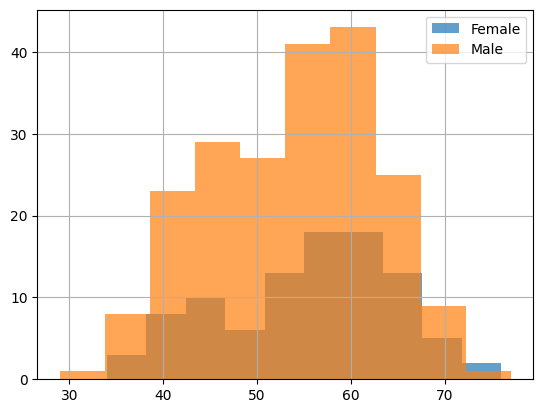

In [16]:
df[df["sex"] == 0 ]["age"].hist(alpha=0.7)
df[df["sex"] == 1 ]["age"].hist(alpha=0.7)
plt.legend(["Female", "Male"])
plt.show()

#alpha=0.5 معناها الشفافية 50%o
#legend() تضيف مفتاح ألوان يوضح كل لون بيمثل إيه

 **Missing values**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("fuel-econ.csv")

car_pivot = df.pivot_table(values="cylinders", index="make", columns="year", aggfunc="mean") #, fill_value=0)
car_pivot.head()


year,2013,2014,2015,2016,2017,2018
make,,,,,,
Acura,4.888889,5.090909,5.000000,5.333333,5.333333,5.500000
Alfa Romeo,NaN,NaN,NaN,NaN,4.666667,4.666667
Aston Martin,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
Audi,5.774194,6.064516,5.684211,5.388889,5.064516,5.117647
BMW,6.534884,6.135802,6.030303,5.781609,5.755814,5.595238


In [20]:
car_pivot.isna().head()
# 🟡 .isna() → ترجع جدول True/False

year,2013,2014,2015,2016,2017,2018
make,,,,,,
Acura,False,False,False,False,False,False
Alfa Romeo,True,True,True,True,False,False
Aston Martin,False,False,False,False,False,False
Audi,False,False,False,False,False,False
BMW,False,False,False,False,False,False


In [24]:
car_pivot.isna().any()
# 🟢 .isna().any() → هل العمود فيه أي NaN؟

year
2013    True
2014    True
2015    True
2016    True
2017    True
2018    True
dtype: bool

In [22]:
car_pivot.isna().sum()
# 🔵 .isna().sum() → عدد القيم المفقودة

year
2013    3
2014    4
2015    5
2016    5
2017    3
2018    5
dtype: int64

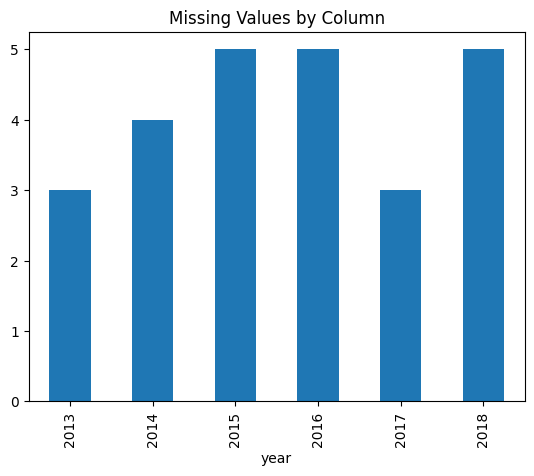

In [28]:
car_pivot.isna().sum().plot(kind="bar" , title="Missing Values by Column")
plt.show()

In [31]:
car_pivot_cleaned = car_pivot.dropna()
car_pivot_cleaned.head()

# بيشيل الصفوف اللي فيها أي NaN
# ⚠️ خطر لو عندك كتير → ممكن تخسر بيانات مهمة

year,2013,2014,2015,2016,2017,2018
make,,,,,,
Acura,4.888889,5.090909,5.000000,5.333333,5.333333,5.500000
Aston Martin,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
Audi,5.774194,6.064516,5.684211,5.388889,5.064516,5.117647
BMW,6.534884,6.135802,6.030303,5.781609,5.755814,5.595238
Bentley,10.666667,10.285714,9.714286,9.714286,10.000000,10.400000


In [33]:
car_pivot_filled = car_pivot.fillna(0)
car_pivot_filled.head()
# car_pivot = df.pivot_table()  تعويض بقيمة ثابتة وممكن تعمله في دالة ال

year,2013,2014,2015,2016,2017,2018
make,,,,,,
Acura,4.888889,5.090909,5.000000,5.333333,5.333333,5.500000
Alfa Romeo,0.000000,0.000000,0.000000,0.000000,4.666667,4.666667
Aston Martin,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
Audi,5.774194,6.064516,5.684211,5.388889,5.064516,5.117647
BMW,6.534884,6.135802,6.030303,5.781609,5.755814,5.595238


In [34]:
car_pivot_filled = car_pivot.fillna(car_pivot.mean())
car_pivot_filled.head()

year,2013,2014,2015,2016,2017,2018
make,,,,,,
Acura,4.888889,5.090909,5.000000,5.333333,5.333333,5.500000
Alfa Romeo,5.949278,5.941007,5.883449,5.828599,4.666667,4.666667
Aston Martin,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
Audi,5.774194,6.064516,5.684211,5.388889,5.064516,5.117647
BMW,6.534884,6.135802,6.030303,5.781609,5.755814,5.595238


**Creating DataFrames**

انشاء DF من List of Dictionaries (صفوف)

من Dictionary of Lists (أعمدة)

✅ أولاً: List of Dictionaries → كل صف في جدول هو Dictionary
✨ الفكرة:

كل dictionary = صف (row)

كل key = اسم العمود

كل value = القيمة في الصف



In [36]:
import pandas as pd

data = [
    {"name": "Ibrahim", "age": 19, "height_cm": 175, "weight_kg": 85},
    {"name": "Mohammed", "age": 20, "height_cm": 175, "weight_kg": 70}
]

df = pd.DataFrame(data)
df

,name,age,height_cm,weight_kg
0,Ibrahim,19,175,85
1,Mohammed,20,175,70


✅ ثانيًا: Dictionary of Lists → كل عمود هو List
✨ الفكرة:

كل key = اسم العمود

كل value = قائمة تمثل العمود بالكامل

In [37]:
data = {
    "name" : ["Ibrahim", "Mohammed"],
    "age" : [19, 20],
    "height_cm" : [175, 85],
    "weight_kg" : [85, 70]
}

df = pd.DataFrame(data)
df

,name,age,height_cm,weight_kg
0,Ibrahim,19,175,85
1,Mohammed,20,85,70
